# Body fat prediction

For this task, a dataset Body Fat Prediction Dataset was used. You can find it here: https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset. Kaggle is a great platform for finding not only datasets, but also models. In addition, you can compete there in competitions or discuss about datasets and ML.


The task is to determine the body fat percentage. For this, you will use different measurements like chest circumference, abdomen circumference, weight, age etc. Since we are predicting a specific number, this task is a regression task.

## Data loading

### Option A: Loading directly from Kagglehub

In [ ]:
import kagglehub
import os
import numpy as np
import pandas as pd

path = kagglehub.dataset_download("fedesoriano/body-fat-prediction-datasetn")

print("Path to dataset files:", path)

for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv(f'{path}/bodyfat.csv')

### Option B: Loading from a csv file

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('bodyfat.csv')


## Data analysis

Display the first few rows of the dataset for an initial preview

In [2]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


Basic check like searching for missing values etc.

In [4]:
# Descriptive statistics for numeric columns (e.g., mean, median, std, min, max)
print("\nDescriptive statistics:")
print(df.describe())

# Check for missing values in the dataset
print("\nMissing values:")
print(df.isnull().sum())


Descriptive statistics:
          Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.019031    8.368740   12.602040   29.389160    3.662856    2.430913   
min      0.995000    0.000000   22.000000  118.500000   29.500000   31.100000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   38.000000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000   39.425000   
max      1.108900   47.500000   81.000000  363.150000   77.750000   51.200000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.824206   92.555952   99.904762   59.405952   38.590476   23.102381   
st

In [5]:
# Check for unusual values (e.g., negative values for body measurements)
print("\nChecking for unusual values (e.g., negative measurements):")
print(df[df.select_dtypes(include=['float64', 'int64']).lt(0).any(axis=1)])


Checking for unusual values (e.g., negative measurements):
Empty DataFrame
Columns: [Density, BodyFat, Age, Weight, Height, Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, Wrist]
Index: []


Correlation check to see if we need to use all the available columns.
Please, note, that Density and BodyFat are very highly negatively correlated. In this particular dataset, it is caused bythe fact that Body Fat was computed by formula using Density. In real life, this would be questionnable, in our example, we will simply use Density column for training. It has a huge impact on the result. You may try to omit it and train the model - the result is going to be singificantly worse.

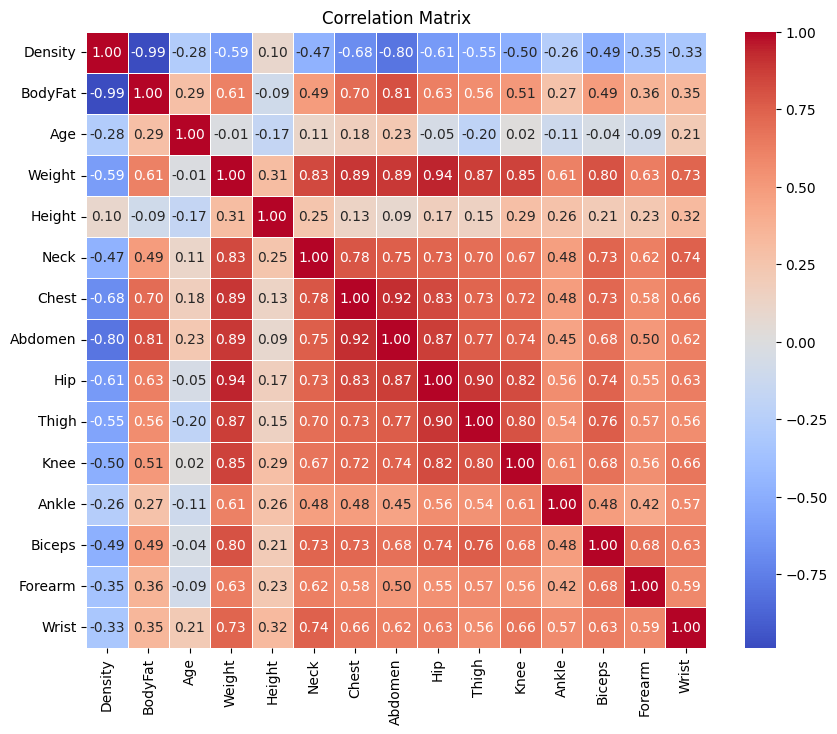

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Feature and Target Selection, Splitting the data

In [19]:
X = df.drop(columns=['BodyFat'])  # Features (independent variables)
y = df['BodyFat']  # Target (dependent variable)

Split the data into training and testing sets (80% train, 20% test)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training
This time we will create a pipeline to do two things together. At first we scale the features, then we apply the regression model. Model is ready, you can just use it. Scikit learn library contains a lot of ready to use models, you can just change some parameters.

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

## Regression metrics

In [22]:
y_pred = pipeline.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.46
Mean Squared Error (MSE): 0.38
Root Mean Squared Error (RMSE): 0.62
R-squared (R²): 0.99


- MAE: The model’s predictions are off by an average of 0.46 percentage points in body fat, which is quite accurate.

- MSE: The average of the squared differences between predictions and true values is 0.38, indicating small prediction errors.

- RMSE: The average prediction error is 0.62 percentage points, which is low and shows the model is making accurate predictions.

- R-squared: The model explains 99% of the variance in body fat percentage, indicating an excellent fit to the data. Thanks to that highly correlated variable (Density).

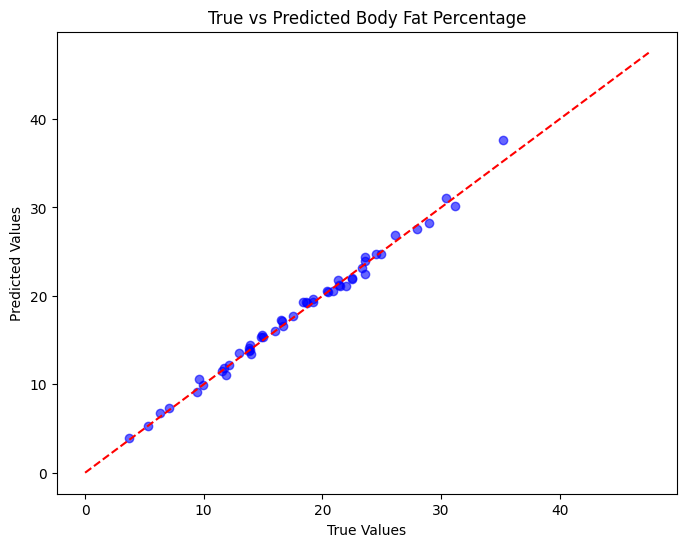

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Ideal line (y = y_pred)
plt.title("True vs Predicted Body Fat Percentage")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

The metrics above are maybe not easy to imagine. That's why we have this chart.
The red dashed line represents the ideal line where the predicted values would exactly match the true values (`y_pred = y_test`). 

Each blue point represents a pair of actual values (`y_test`, the true body fat percentage) and predicted values (`y_pred`, the model's predicted body fat percentage) for the test set. Ideally, the points should be close to the red dashed line.

If the points are close to the red line, it indicates that the model is making accurate predictions.